2023-05-11 15:54:44,443 INFO Welcome to the CDS
2023-05-11 15:54:44,444 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-11 15:54:44,760 INFO Request is completed
2023-05-11 15:54:44,760 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data5/adaptor.mars.internal-1683743599.7239895-26230-6-b30bf86b-4c96-4611-bc4d-499123ebcd7f.nc to ../pyAPS_data/example/ERA5_2020-01-03T00:00_130.24_31.25_131.26_32.65.nc (8.5K)
2023-05-11 15:54:48,028 INFO Download rate 2.6K/s
2023-05-11 15:54:49,185 INFO Welcome to the CDS
2023-05-11 15:54:49,186 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-11 15:54:49,685 INFO Request is completed
2023-05-11 15:54:49,686 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data2/adaptor.mars.internal-1683743810.6669247-23948-9-88254f8e-3baa-497e-8750-256

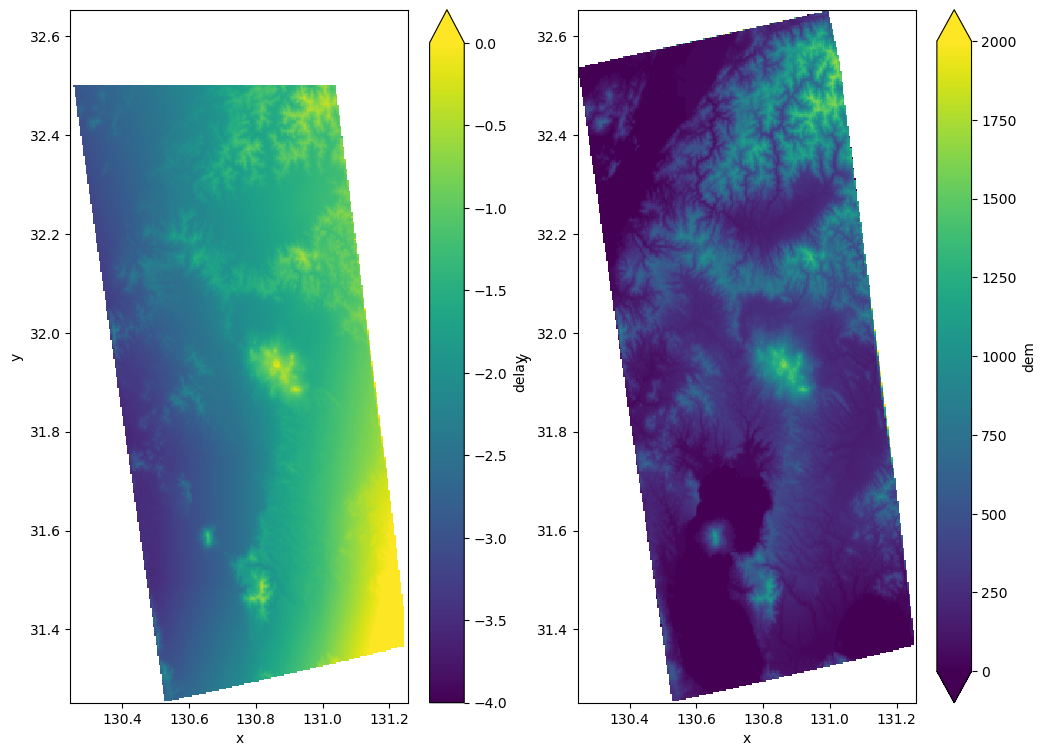

In [1]:
import sys
import xarray as xr
import matplotlib.pyplot as plt

# this relative path assumes you are in the notebooks directory
sys.path.append('..')
from phase_o_matic import presto_phase_delay

# this relative path assumes you are in the notebooks directory
dem_dataset = xr.open_dataset('../pyAPS_data/pyaps_geom.nc')

work_dir = '../pyAPS_data/example'

t1 = presto_phase_delay(date = '2020-01-03', geometry = dem_dataset, work_dir = work_dir, wavelength = 0.238403545)
t2 = presto_phase_delay(date = '2020-01-10', geometry = dem_dataset, work_dir = work_dir, wavelength = 0.238403545)

delay_change = t2.isel(time = 0)['delay'] - t1.isel(time = 0)['delay']

fig, axes = plt.subplots(1, 2, figsize = (12, 9))
delay_change.plot(ax = axes[0], vmax = 0, vmin = -4)
dem_dataset['dem'].plot(ax = axes[1], vmin = 0, vmax = 2000)
plt.savefig('../images/usage.png')

In [6]:
t2

<xarray.Dataset>
Dimensions:         (time: 1, x: 237, y: 460)
Coordinates:
  * time            (time) datetime64[ns] 2020-01-10
    latitude        (y) float64 31.25 31.26 31.26 31.26 ... 32.65 32.65 32.65
    longitude       (x) float64 130.2 130.3 130.3 130.3 ... 131.2 131.3 131.3
    height          (y, x) float64 nan nan nan nan nan ... nan nan nan nan nan
  * y               (y) float64 31.25 31.26 31.26 31.26 ... 32.65 32.65 32.65
  * x               (x) float64 130.2 130.3 130.3 130.3 ... 131.2 131.3 131.3
Data variables:
    air_pressure    (time, y, x) float64 nan nan nan nan nan ... nan nan nan nan
    temperature     (time, y, x) float64 nan nan nan nan nan ... nan nan nan nan
    vapor_pressure  (time, y, x) float64 nan nan nan nan nan ... nan nan nan nan
    N_dry           (time, y, x) float64 nan nan nan nan nan ... nan nan nan nan
    N_wet           (time, y, x) float64 nan nan nan nan nan ... nan nan nan nan
    N               (time, y, x) float64 nan nan nan nan nan ... nan nan nan nan
    delay           (time, y, x) float64 nan nan nan nan nan ... nan nan nan nan
Attributes:
    Conventions:  CF-1.6
    history:      2023-05-10 18:36:51 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...